# Analysis on Lyft's Bay Wheels Bike Sharing Program

# Table of Contents
- Gathering
- Assessing
- Cleaning
- Analysis

## Gathering

In [1]:
import os
import requests
import zipfile
import io
import glob
import numpy as np
import pandas as pd

In [2]:
#Create folder to store files
folder_name = 'raw_files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
#Create function to download and extract files from source
def extract(x):
    #download file and extract
    response= requests.get(x)
    try:
        zp = zipfile.ZipFile(io.BytesIO(response.content))
        zp.extractall(folder_name)
    
    #if not a valid link, ignore and continue the script
    except zipfile.BadZipFile:
        pass

In [4]:
#Get the month year component of the URL
month_year = []
for i in range(2017, 2020):
    if i == 2017:
        month_year.append(str(i))
    else:
        for j in range(1,13):
            month_year.append(str(i) + str(j).zfill(2))  #make sure MM is in double digit

In [ ]:
#Re-create URL and download link
for i in month_year:
    if i < '201905':
        old_url = 'https://s3.amazonaws.com/baywheels-data/{}-fordgobike-tripdata.csv.zip'.format(i)
        extract(old_url)
    else:
        new_url = 'https://s3.amazonaws.com/baywheels-data/{}-baywheels-tripdata.csv.zip'.format(i)
        extract(new_url)

In [5]:
#Concatenate all csv into one dataframe
master = pd.concat((pd.read_csv(files, dtype={'bike_share_for_all_trip': object, 'rental_access_method': object}) for files in glob.glob(folder_name+'/*.csv')), sort=False, ignore_index=True)

In [6]:
#Clone master file
df = master.copy()

In [7]:
#Ensure dataframe is working
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
3257830,1266,2019-05-31 14:13:21.9950,2019-05-31 14:34:28.0730,133.0,Valencia St at 22nd St,37.755213,-122.420975,47.0,4th St at Harrison St,37.780955,-122.399749,2543,Subscriber,No,NaN
220160,556,2017-10-21 13:50:27.4650,2017-10-21 13:59:44.1570,55.0,Webster St at Grove St,37.777053,-122.429558,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,3192,Subscriber,NaN,NaN
4606558,369,2019-11-19 18:46:48.9420,2019-11-19 18:52:58.2020,338.0,13th St at Franklin St,37.803189,-122.270579,181.0,Grand Ave at Webster St,37.811377,-122.265192,10062,Subscriber,No,NaN
4091326,206,2019-08-01 18:20:13.2320,2019-08-01 18:23:39.7150,90.0,Townsend St at 7th St,37.771058,-122.402717,91.0,Berry St at King St,37.771762,-122.398438,563,Subscriber,No,NaN
1510672,1143,2018-07-06 05:47:24.6500,2018-07-06 06:06:28.0360,14.0,Clay St at Battery St,37.795001,-122.399970,145.0,29th St at Church St,37.743684,-122.426806,4020,Subscriber,No,NaN


## Assessing

In [8]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740302 entries, 0 to 4740301
Data columns (total 15 columns):
duration_sec               4740302 non-null int64
start_time                 4740302 non-null object
end_time                   4740302 non-null object
start_station_id           4668816 non-null float64
start_station_name         4669413 non-null object
start_station_latitude     4740302 non-null float64
start_station_longitude    4740302 non-null float64
end_station_id             4666976 non-null float64
end_station_name           4667526 non-null object
end_station_latitude       4740302 non-null float64
end_station_longitude      4740302 non-null float64
bike_id                    4740302 non-null int64
user_type                  4740302 non-null object
bike_share_for_all_trip    4127445 non-null object
rental_access_method       93157 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 542.5+ MB


In [9]:
df.user_type.unique(), df.bike_share_for_all_trip.unique(), df.rental_access_method.unique()

(array(['Customer', 'Subscriber'], dtype=object),
 array([nan, 'No', 'Yes'], dtype=object),
 array([nan, 'app', 'clipper'], dtype=object))

In [10]:
df.bike_id.value_counts().describe()

count    12109.000000
mean       391.469320
std        436.445047
min          1.000000
25%         74.000000
50%        193.000000
75%        610.000000
max       2000.000000
Name: bike_id, dtype: float64

In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,NaN


In [12]:
#Check for missing coordinates
df.query('start_station_latitude == 0 | end_station_latitude ==0').head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
3016391,2365,2019-04-30 18:21:42.6100,2019-04-30 19:01:08.1460,50.0,2nd St at Townsend St,37.780526,-122.390288,420.0,SF Test Station,0.0,0.0,1612,Subscriber,No,NaN
3017157,1964,2019-04-30 17:31:19.6460,2019-04-30 18:04:04.5180,98.0,Valencia St at 16th St,37.765052,-122.421866,420.0,SF Test Station,0.0,0.0,3507,Subscriber,No,NaN
3017311,546,2019-04-30 17:45:38.4520,2019-04-30 17:54:45.2580,370.0,Jones St at Post St,37.787327,-122.413278,420.0,SF Test Station,0.0,0.0,1142,Subscriber,Yes,NaN
3017390,630,2019-04-30 17:39:33.5070,2019-04-30 17:50:04.3140,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420.0,SF Test Station,0.0,0.0,3500,Subscriber,No,NaN
3017843,433,2019-04-30 17:17:10.4860,2019-04-30 17:24:23.9190,11.0,Davis St at Jackson St,37.797280,-122.398436,420.0,SF Test Station,0.0,0.0,1181,Subscriber,No,NaN


In [13]:
#Check for missing station id
df[df.end_station_id.isnull()|df.start_station_id.isnull()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
1143064,5572,2018-06-30 20:58:31.8550,2018-06-30 22:31:24.5930,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,No,NaN
1143076,573,2018-06-30 22:12:27.5110,2018-06-30 22:22:01.1740,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,Yes,NaN
1143093,850,2018-06-30 22:01:25.5850,2018-06-30 22:15:36.1510,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4122,Customer,No,NaN
1143129,562,2018-06-30 21:52:05.1180,2018-06-30 22:01:27.4400,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4184,Subscriber,No,NaN
1143156,819,2018-06-30 21:37:34.5060,2018-06-30 21:51:13.7290,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4137,Customer,No,NaN


In [14]:
#Check for duplicates
df[df.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method


### Action Plan

#### Quality Related
- Convert *start_time* and *end_time* to datefime
- Convert *start_station_id*, *end_station_id* and *bike_id* to strings
- Remove entries with missing station id

#### Tidiness Related
- Create new duration column in minutes
- Create new datetime columns
- Calculate distance based off coordinates (latitude and longitude)
- Create bins based on time of usage (Morning, Afternoon, Evening, Night)

## Cleaning

### Convert *start_time* and *end_time* to datefime

In [15]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [16]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
4740297,3699,2019-11-09 16:23:04,2019-11-09 17:24:43,NaN,NaN,37.805850,-122.470256,NaN,NaN,37.776148,-122.392519,320825,Subscriber,NaN,app
4740298,4099,2019-11-23 10:52:35,2019-11-23 12:00:55,NaN,NaN,37.806367,-122.435708,NaN,NaN,37.827707,-122.481640,561068,Subscriber,NaN,app
4740299,3938,2019-11-23 10:52:16,2019-11-23 11:57:55,NaN,NaN,37.806381,-122.435732,NaN,NaN,37.805155,-122.448127,713264,Subscriber,NaN,app
4740300,1457,2019-11-01 12:37:43,2019-11-01 13:02:01,NaN,NaN,37.806662,-122.413747,NaN,NaN,37.774648,-122.414078,283550,Subscriber,NaN,app
4740301,3890,2019-11-10 15:32:35,2019-11-10 16:37:26,NaN,NaN,37.807383,-122.435960,NaN,NaN,37.758382,-122.387424,185504,Subscriber,NaN,app


### Convert *start_station_id*, *end_station_id* and *bike_id* to strings

In [17]:
df['start_station_id'] = df['start_station_id'].astype(str).str.replace('\.0','')
df['end_station_id'] = df['end_station_id'].astype(str).str.replace('\.0','')
df['bike_id'] = df['bike_id'].astype(str)

**Test**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740302 entries, 0 to 4740301
Data columns (total 15 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: datetime64[ns](2), float64(4), int64(1), object(8)
memory usage: 542.5+ MB


### Remove entries with missing station id and station name

In [19]:
df.dropna(subset=['start_station_id', 'end_station_id', 'start_station_name', 'end_station_name'], inplace=True)

**Test**

In [20]:
df[df.end_station_id.isnull()|df.start_station_id.isnull()|df.start_station_name.isnull()|df.end_station_name.isnull()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method


### Create new duration column in minutes

In [21]:
df['duration_min'] = (df.duration_sec/60).round(2)

### Create new datetime columns

In [22]:
df['start_year'] = df.start_time.dt.year
df['start_month'] = df.start_time.dt.month
df['start_week'] = df.start_time.dt.weekday_name
df['start_date'] = df.start_time.dt.to_period('M')
df['start_hour'] = df.start_time.dt.hour

In [23]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
classes = pd.api.types.CategoricalDtype(ordered=True, categories= weekday_order)
df['start_week'] = df.start_week.astype(classes)

### Calculate distance based off coordinates

In [24]:
#Function for the haversine formula
#All credit goes to @derricw: https://stackoverflow.com/a/29546836

def haversine(lon1, lat1, lon2, lat2):
    
    """    
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367.8 * c # Units in km.  3959.87433 for miles
    return km

In [25]:
#Create column
df['distance'] = haversine(df['start_station_longitude'],df['start_station_latitude'],df['end_station_longitude'],df['end_station_latitude'])

In [26]:
#Could see that there are outliners due to missing coordinates
df.query('start_station_latitude == 0 | end_station_latitude ==0').head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,duration_min,start_year,start_month,start_week,start_date,start_hour,distance
3016391,2365,2019-04-30 18:21:42.610,2019-04-30 19:01:08.146,50,2nd St at Townsend St,37.780526,-122.390288,420,SF Test Station,0.0,...,Subscriber,No,NaN,39.42,2019,4,Tuesday,2019-04,18,12786.379906
3017157,1964,2019-04-30 17:31:19.646,2019-04-30 18:04:04.518,98,Valencia St at 16th St,37.765052,-122.421866,420,SF Test Station,0.0,...,Subscriber,No,NaN,32.73,2019,4,Tuesday,2019-04,17,12789.588682
3017311,546,2019-04-30 17:45:38.452,2019-04-30 17:54:45.258,370,Jones St at Post St,37.787327,-122.413278,420,SF Test Station,0.0,...,Subscriber,Yes,NaN,9.10,2019,4,Tuesday,2019-04,17,12787.988074
3017390,630,2019-04-30 17:39:33.507,2019-04-30 17:50:04.314,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420,SF Test Station,0.0,...,Subscriber,No,NaN,10.50,2019,4,Tuesday,2019-04,17,12786.874940
3017843,433,2019-04-30 17:17:10.486,2019-04-30 17:24:23.919,11,Davis St at Jackson St,37.797280,-122.398436,420,SF Test Station,0.0,...,Subscriber,No,NaN,7.22,2019,4,Tuesday,2019-04,17,12786.372190


In [27]:
df = df.query('start_station_latitude != 0 & end_station_latitude !=0')
df = df.reset_index(drop=True)

**Test**

In [28]:
df.query('start_station_latitude == 0 | end_station_latitude ==0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,duration_min,start_year,start_month,start_week,start_date,start_hour,distance


### Create bins based on time of usage

In [29]:
#Define Morning: 5:00 - 11:59, Afternoon: 12:00 to 16:59, Evening: 17:00 - 20:59, Night: 21- 4:59

bin_name = ['NightX','Morning', 'Afternoon','Evening','Night']
bin_edges= [0,5,12,17,21,24]
df['period'] = pd.cut(df['start_hour'], bin_edges, labels=bin_name, right=False).str.replace('NightX','Night')

#Make them categorical
period_class_order = ['Morning', 'Afternoon','Evening','Night']
classes = pd.api.types.CategoricalDtype(ordered=True, categories= period_class_order)
df['period'] = df.period.astype(classes)

### What is the structure of your dataset?

This dataset contains more than 4.5 million records and spans over a 2-year time frame  It has 15 features originally (duration, start/end time, start/end station id, start/end station name, start/end latitude/longitude, bike id, user type, bike share for all enrollment, and rental access method), but was expanded to 22 for greater granularity.

We have broken down the start time into years, months, days of week, and hours, as well as categorizing each entry into parts of the day (Morning, Afternoon, Evening, Night).  In addition, We have converted seconds to minutes for better readability and calculated travel distance by using the haversine formula.

### What is/are the main feature(s) of interest in your dataset?

In order to gain a better understanding of our Bay Wheels users, we are mostly interested in the duration and distance of each bike ride as well as the breakdown of usage based on time and day of the week.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

We will focus on analyzing quatitative valuables such as distance (km), duration (min), and time (24-hour clock) as well as on qualatitive valuables such as day of the week (Mon, Tue, etc), part of the day (Morning, Afternoon, etc), user type (subscriber/customer), and Bike Share for All enrollment (a program for low-income households).  

## Analysis

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [31]:
#Define log function
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)

### Univariate Exploration

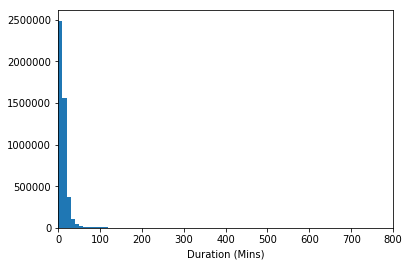

In [32]:
#Standard-scale plot
bin_edges = np.arange(0, df.duration_min.max()+ 10, 10)
plt.hist(data=df, x='duration_min', bins=bin_edges)
plt.xlim(0, 800)
plt.xlabel('Duration (Mins)');

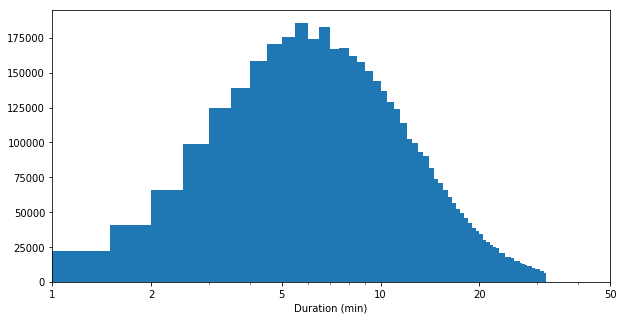

In [33]:
#Heavily skewed to the right.  Log transformation
bin_edges = 10* np.arange(log_trans(df.duration_min.min()), log_trans(df.duration_min.max()) + 0.05, 0.05)

plt.figure(figsize=[10,5])
plt.hist(data=df, x='duration_min', bins=bin_edges)
plt.xscale('log')
tick_locs= [1,2,5,10,20,50,100,200, 500,1000,2000]
plt.xticks(tick_locs, tick_locs)
plt.xlim(1,50)
plt.xlabel('Duration (min)');

Duration has a right-skewed distrbution.  We can clearly see the reason behind when plotted on a log-scale as the majority of bike rides take less than 50 minutes.

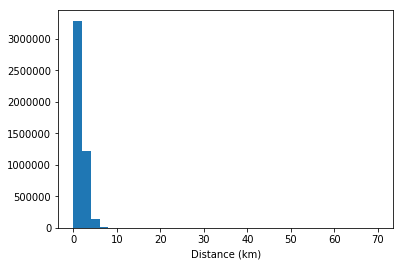

In [34]:
#Standard-scale plot
bin_edges = np.arange(0, df.distance.max() + 2, 2)
plt.hist(data=df, x='distance', bins= bin_edges);
plt.xlabel('Distance (km)');

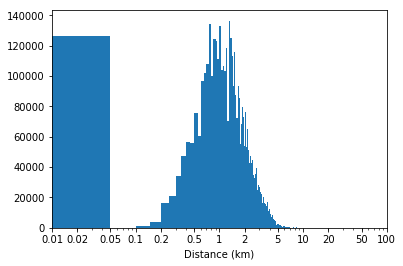

In [35]:
#Log transform
bins_edge = 10 * np.arange(0, log_trans(df.distance.max()) + 0.005, 0.005)
plt.hist(data=df, x='distance', bins=bins_edge)
plt.xscale('log')
tick_locs= [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100]
plt.xticks(tick_locs,tick_locs)
plt.xlabel('Distance (km)');

In [36]:
#Drop entries that have theh same coordinates.  Save them in another dataframe in case we need to reference them later

df_error = df[(df.start_station_latitude == df.end_station_latitude) & (df.start_station_longitude == df.end_station_longitude)]
df = df[(df.start_station_latitude != df.end_station_latitude) | (df.start_station_longitude != df.end_station_longitude)]
df = df.reset_index(drop=True)

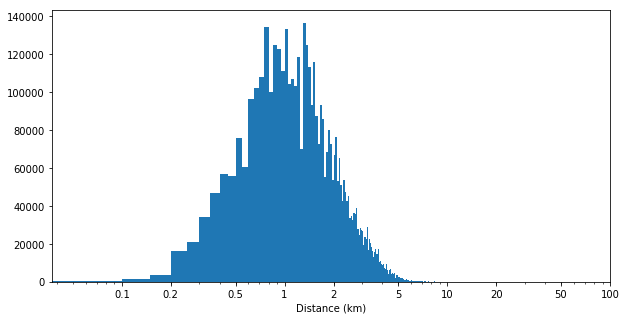

In [37]:
bins_edge = 10 * np.arange(0, log_trans(df.distance.max()) + 0.005, 0.005)
plt.figure(figsize=[10,5])
plt.hist(data=df, x='distance', bins=bins_edge)
plt.xscale('log')
tick_locs= [0.1,0.2,0.5,1,2,5,10,20,50,100]
plt.xticks(tick_locs,tick_locs)
plt.xlabel('Distance (km)');

Similarly, the histogram for distance is severely right-skewed.  Close examinations show that this is due to entries with the same start and end point, which returns 0 km by the haversine formula.  Although we acknowledge that users can return their bikes to the same station upon usage, this formula relies on two points with different coordinates.  Since we do not have any other way of determining distance for these entries, we will omit them from our analysis.  

After clean-up, we can see that the majority of the bike rides are between 0.1 and 10 kilometers.

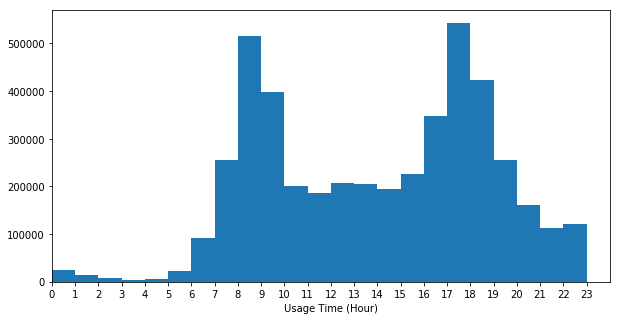

In [38]:
plt.figure(figsize=[10,5])
bin_edge = np.arange(0, 24, 1)
plt.hist(data=df, x='start_hour', bins=bin_edge);
plt.xlim(0,24)
plt.xticks(bin_edge)
plt.xlabel('Usage Time (Hour)');

Usage time has a bimodal distribution, which is expected due to the concept of rush hour.  From the graph above, we can see that usage peaks from 8:00 - 9:00 in the morning and 17:00 - 18:00 in the evening.  

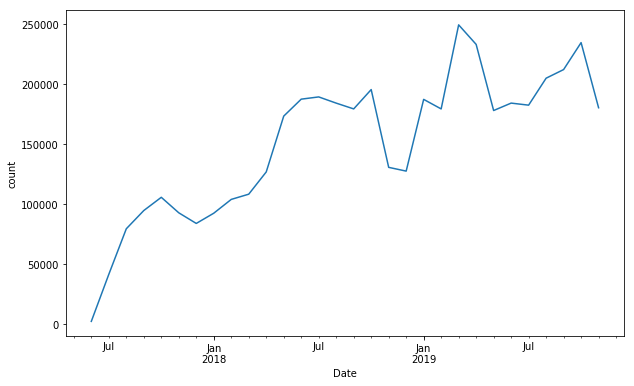

In [39]:
plt.figure(figsize=[10,6])
df.groupby('start_date').bike_id.count().plot()
plt.xlabel('Date')
plt.ylabel('count');

We are unable to identify any unusual seasonal patterns with the exception of a drop in usage from October to December, which is likely due to a lower temperature.

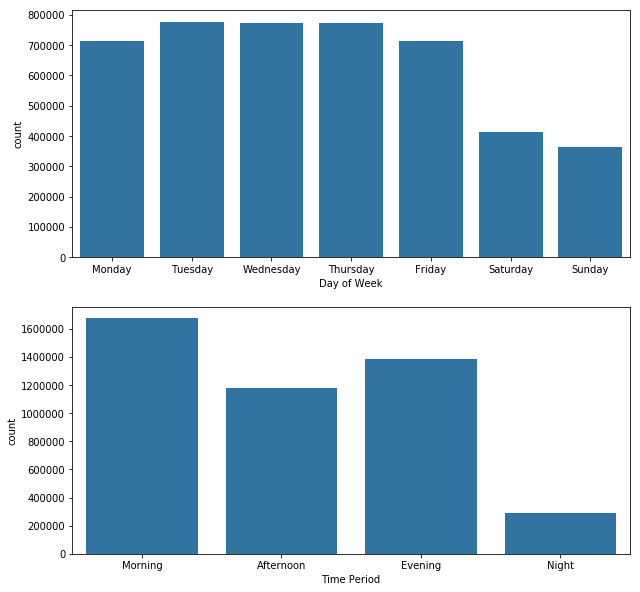

In [40]:
fig, ax = plt.subplots(2,1, figsize=[10,10])
color = sb.color_palette()[0]
sb.countplot(data=df, x='start_week', ax=ax[0], color= color)
sb.countplot(data=df, x='period', ax=ax[1], color= color)
ax[0].set_xlabel('Day of Week')
ax[1].set_xlabel('Time Period');

Usage is significantly higher on weekdays with Tuesdays, Wednesdays, and Thursdays being the most predominant days.  The bikes are also being heavily used in the morning and evening, likely due to rush hour, as illustrated earlier.  

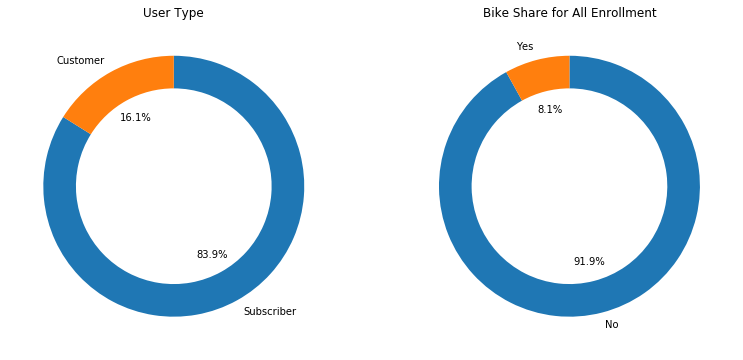

In [41]:
fig, ax= plt.subplots(1,2, figsize=[13,6])

count1=df.user_type.value_counts()
count2=df.bike_share_for_all_trip.value_counts()

ax[0].pie(count1, labels=count1.index, startangle=90, counterclock=False, autopct='%.1f%%', wedgeprops={'width':0.25})
ax[1].pie(count2, labels=count2.index, startangle=90, counterclock=False, autopct='%.1f%%', wedgeprops={'width':0.25})
ax[0].set_title('User Type')
ax[1].set_title('Bike Share for All Enrollment');

Subscribers account for 83.9% of all user type and most of the users are not enrolled in the Bike Share for All program.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

As explained earlier, duration has a right-skewed distrbution with the majority of entries being below 50 minutes; a log transformation was performed in order to better illustrate this point.  

On the other hand, we did not have to do any scaling for usage time.  Its distribution is bimodal, meaning that there are 2 peaks -- one from 8:00 - 9:00 in the morning and the other from 17:00 - 18:00 in the evening.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

At first glance, we can see that the histogram for distance is severely right-skewed with a lot of 0 km entries.  Close examinations show that this is due to a limitation in the haversine formula, which requires the starting and ending coordinates to be different.  Although we acknowledge that users can return their bikes to the same station upon usage, we have decided to omit those entries as distance cannot be accurately calculated for our analysis.    

### Bivariate Exploration

In [42]:
#I have sample 5000 entries so that certain plots are clearer and render faster
np.random.seed(0)
samples = np.random.choice(df.shape[0], 5000, replace = False)
df_samp = df.loc[samples,:]
df_samp['log_min'] = df_samp['duration_min'].apply(log_trans)
df_samp['log_distance'] = df_samp['distance'].apply(log_trans)

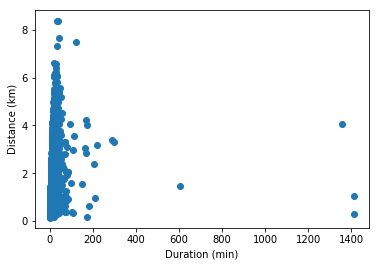

In [43]:
#Standard-scale plot
plt.scatter(data=df_samp, x='duration_min', y='distance')
plt.xlabel('Duration (min)')
plt.ylabel('Distance (km)');

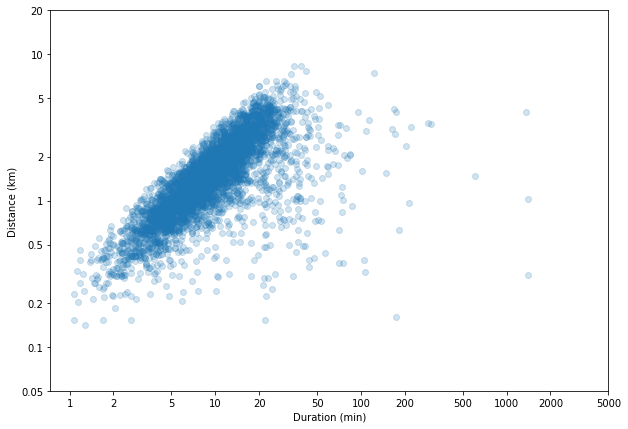

In [44]:
#scatter plot of duration vs. distance, with log transform on both axis

tick_locs1= [1,2,5,10,20,50,100,200,500,1000, 2000, 5000] # values for duration
tick_locs2= [0.05,0.1,0.2,0.5,1,2,5,10,20] # values for distance

plt.figure(figsize=[10,7])

plt.scatter(data=df_samp, x='log_min', y='log_distance', alpha= 0.2)

plt.xticks(log_trans(tick_locs1), tick_locs1)
plt.yticks(log_trans(tick_locs2), tick_locs2)

plt.xlabel('Duration (min)')
plt.ylabel('Distance (km)');

In [45]:
#Pearson correlation after log transform
df_samp[['log_min','log_distance']].corr(method='pearson')

,log_min,log_distance
log_min,1.000000,0.708759
log_distance,0.708759,1.000000


In [46]:
#Spearman correlation for non-linear pair (prior to log transform)
df_samp[['duration_min','distance']].corr(method='spearman')

,duration_min,distance
duration_min,1.00000,0.78106
distance,0.78106,1.00000


After performing the log transformation, our scatter plot shows that duration and distance are highly correlated.  This could also be confirmed by running the .corr() function, which returns a strong value (above 0.7) for both the Pearson and Spearman correlation.    

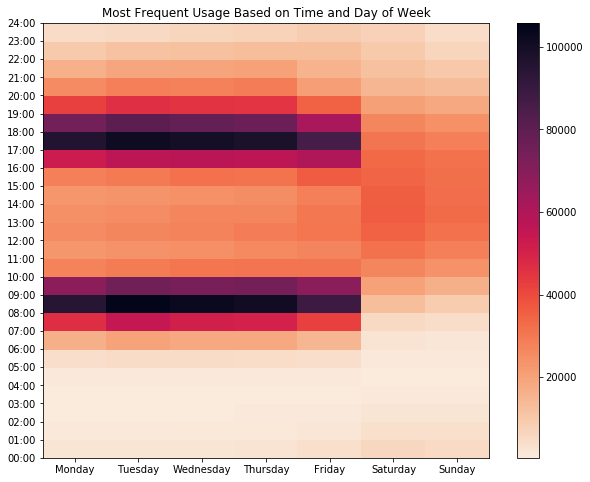

In [47]:
df['start_week_num'] = df.start_time.dt.dayofweek #Convert day of week to numbers. 0 = Monday, 6 = Sunday

plt.figure(figsize=[10,8])

bins_x= np.arange(0,8,1) #X bins
bins_y = np.arange(0,25,1) #Y bins
x_pos = np.arange(0.5, 7.5, 1) #Position of x labels
x_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #Create x labels
#Create y labels
y_label=[]
for i in bins_y:
    time = str(i).zfill(2) + str(':00')
    y_label.append(time)

#Main heatmap code
plt.hist2d(data=df, x='start_week_num', y='start_hour', cmap='rocket_r', cmin=0.1, bins=[bins_x,bins_y])
plt.xticks(x_pos,x_label)
plt.yticks(bins_y, y_label)
plt.colorbar()
plt.title('Most Frequent Usage Based on Time and Day of Week');

This heatmap shows that the peak hours are Tuesdays to Thursdays from 8:00 - 9:00 and from 17:00-18:00. Usage drops significantly after midnight and the weekends are mundane in comparison.

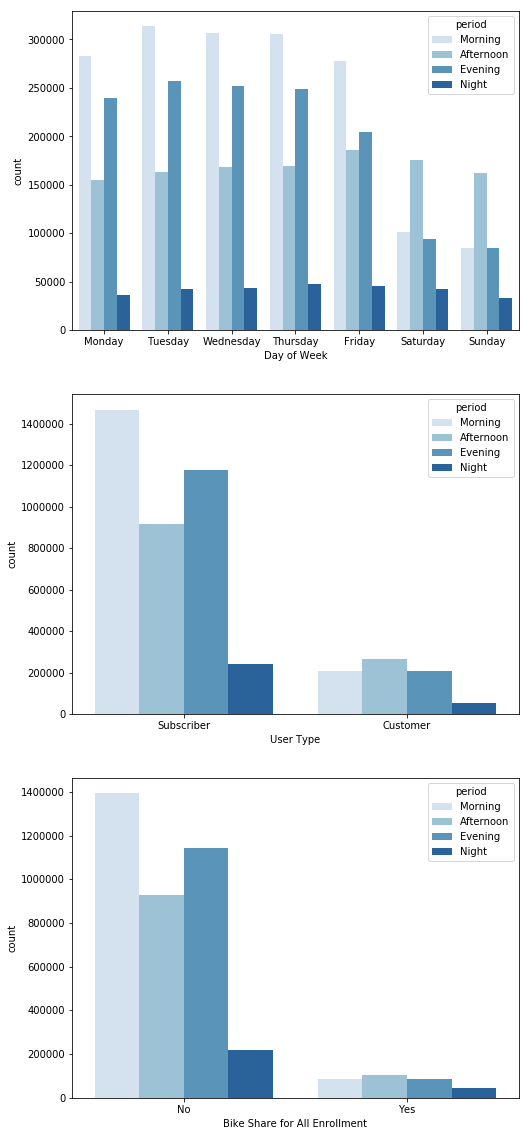

In [48]:
fig, ax = plt.subplots(3,1, figsize=[8,20])
sb.countplot(data=df, x='start_week', hue='period', palette='Blues', ax=ax[0])
sb.countplot(data=df, x='user_type', hue='period', palette='Blues', ax=ax[1], order= df.user_type.value_counts().index)
sb.countplot(data=df, x='bike_share_for_all_trip', hue='period', palette='Blues', ax=ax[2]);
ax[0].set_xlabel('Day of Week')
ax[1].set_xlabel('User Type')
ax[2].set_xlabel('Bike Share for All Enrollment');

Subscribers and non Bike Share for All users follow patterns that we have observed thus far with morning and evening having the highest usages.  Conversely, customers and low-income users access their bikes the most in the afternoon, which ressemble weekend patterns.

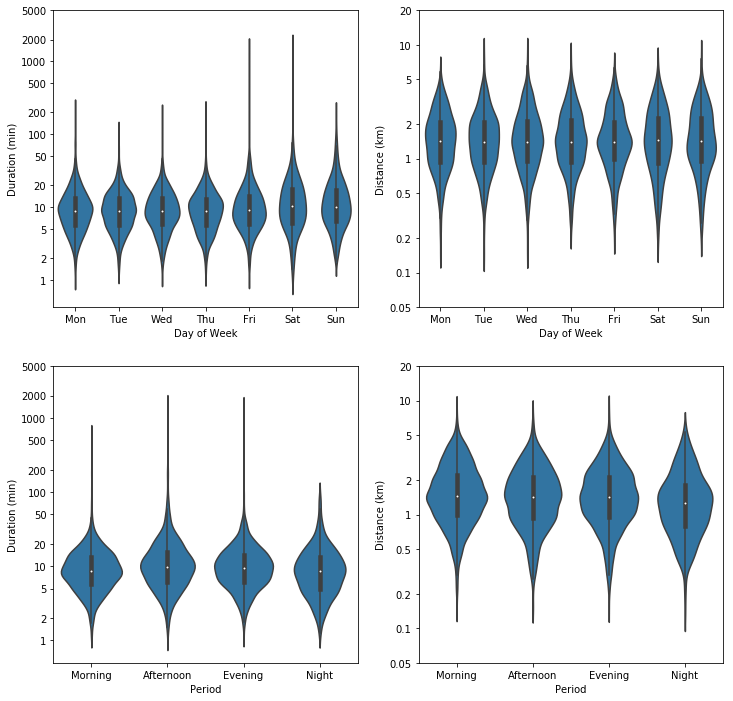

In [49]:
x_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] #Define x labels
cat_vars = ['start_week', 'period'] #Define categorical variables

fig, ax = plt.subplots(2,2, figsize=[12,12])
colors = sb.color_palette()[0]

for i in range(len(cat_vars)):
    var = cat_vars[i]
    sb.violinplot(data=df_samp, x=var, y= 'log_min', ax=ax[i,0], color=colors)
    sb.violinplot(data=df_samp, x=var, y='log_distance', ax=ax[i,1], color=colors)
        
    ax[0,i].set_xticklabels(labels=x_label)
    ax[i,0].set_yticks(log_trans(tick_locs1))
    ax[i,0].set_yticklabels(tick_locs1)
    ax[i,1].set_yticks(log_trans(tick_locs2))
    ax[i,1].set_yticklabels(tick_locs2)    
    ax[0,i].set_xlabel('Day of Week')
    ax[1,0].set_xlabel('Period')
    ax[1,1].set_xlabel('Period')
    ax[i,0].set_ylabel('Duration (min)')
    ax[i,1].set_ylabel('Distance (km)')

The average duration tends to be longer over the weekends with Saturday having sessions that lasted more than 1000 minutes.  Interestingly enough, the average distance traveled did not vary as much.  

Medians for these two variables merely fluctuate throughout the day.  However, it is worth noting that there is a slight drop in distance traveled at night.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a strong positive correlation between duration and distance after the log transformation, indicating that a percent increase in one variable does affect the percent increase in the other.  This can be verified by running the corr() function, which gives a coefficient of greater than 0.7.  We also observed that the overall usage peaks in the morning and evening, especially during Tuesdays to Thursdays from 8:00 - 9:00 and from 17:00-18:00.  Interestly, Bike Share for All users and non-subscribers do not follow this pattern as most of their activities are in the afternoon.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I was surprised to find out that the median as well as the shape of distribution for duration and distance did not vary much throughout the day.  Bike rides do tend to be shorter at night, but the differences are marginal. Violin plots for the night also have shorter tails (fewer outliers), but is expected due to the lower volume compared to other time period.  

### Multivariate Exploration

In [50]:
# Quick hack for creating heat maps with seaborn's PairGrid
def heatmap(x,y, **kwargs):
    bins_x= np.arange(0,8,1) #X bins
    bins_y = np.arange(0,25,1) #Y bins

    x_pos = np.arange(0.5, 7.5, 1) #Position of x labels

    x_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #Create x labels

    #Create y labels
    y_label=[]
    for i in bins_y:
        time = str(i).zfill(2) + str(':00')
        y_label.append(time)

    #Main heatmap code    
    plt.hist2d(data=df, x= x, y= y, cmap='rocket_r', bins=[bins_x,bins_y])
    plt.xticks(x_pos,x_label)
    plt.yticks(bins_y, y_label)

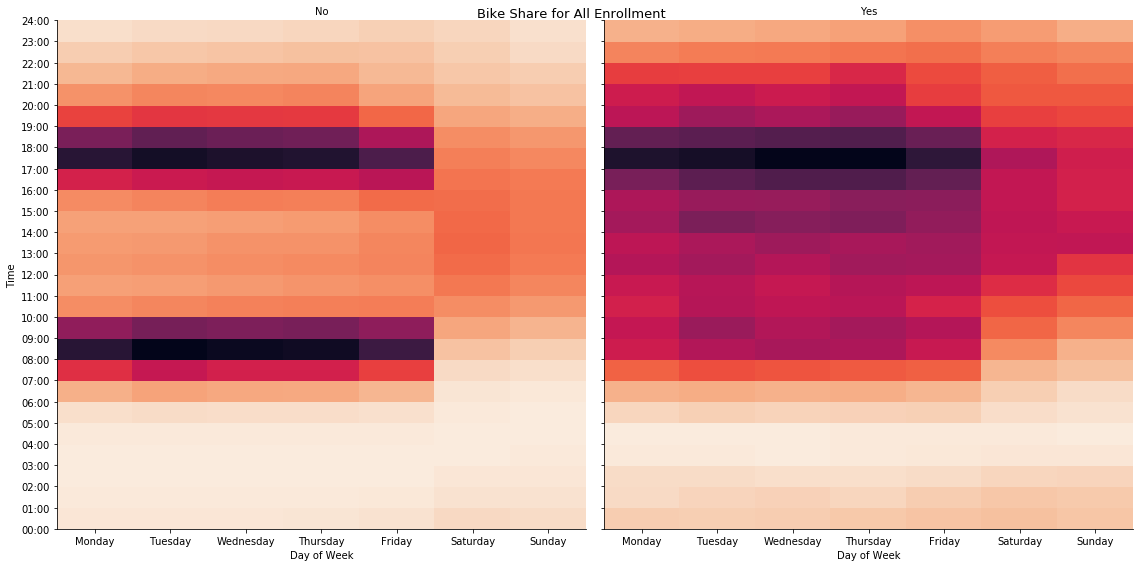

In [51]:
g= sb.FacetGrid(data=df, col='bike_share_for_all_trip', height=8)
g.map(heatmap, 'start_week_num','start_hour')
g.set_xlabels('Day of Week')
g.set_ylabels('Time')
g.set_titles('{col_name}')
g.fig.suptitle('Bike Share for All Enrollment', fontsize=13);

“Rush hour” is not as obvious for those who enrolled in the Bike Share for All program.  The heat map above shows that the absolute peak is from 17:00 to 18:00 on weekdays but there is high usage volume throughout the day, spanning from 8:00 – 20:00.

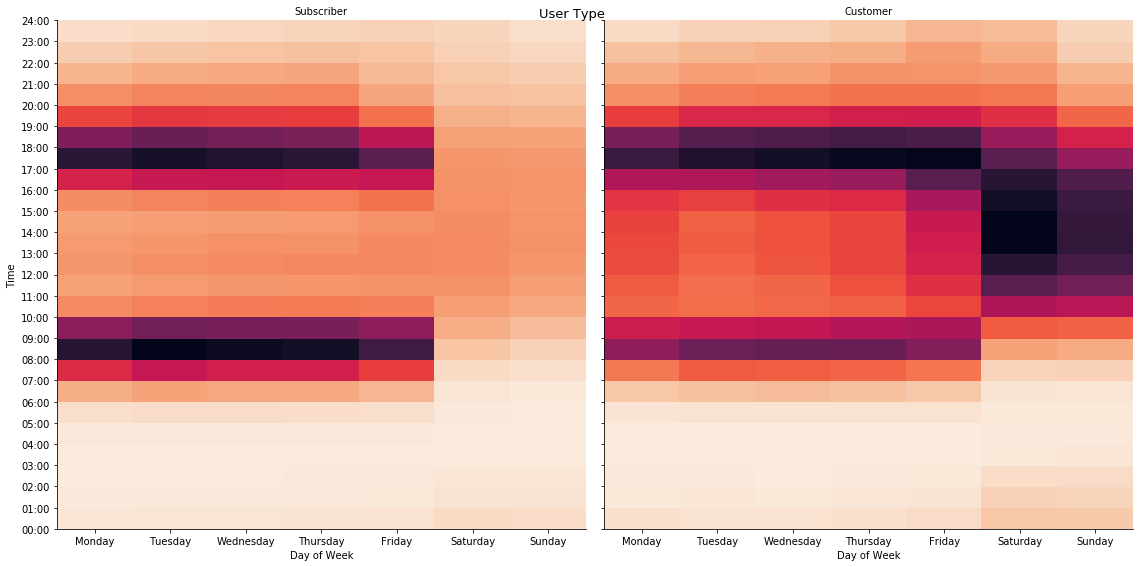

In [52]:
g= sb.FacetGrid(data=df, col='user_type', height=8, col_order = ['Subscriber','Customer'])
g.map(heatmap, 'start_week_num','start_hour')
g.set_xlabels('Day of Week')
g.set_ylabels('Time')
g.set_titles('{col_name}')
g.fig.suptitle('User Type', fontsize=13);

Despite these two user types share the same peak hours on weekdays, there is a big difference in their weekend patterns.  Only a small percentage of subscribers rode their bikes over the weekends.    But we can see that a significant amount of customers use this bike-sharing service between 11:00 – 18:00 on Saturdays and Sundays.  

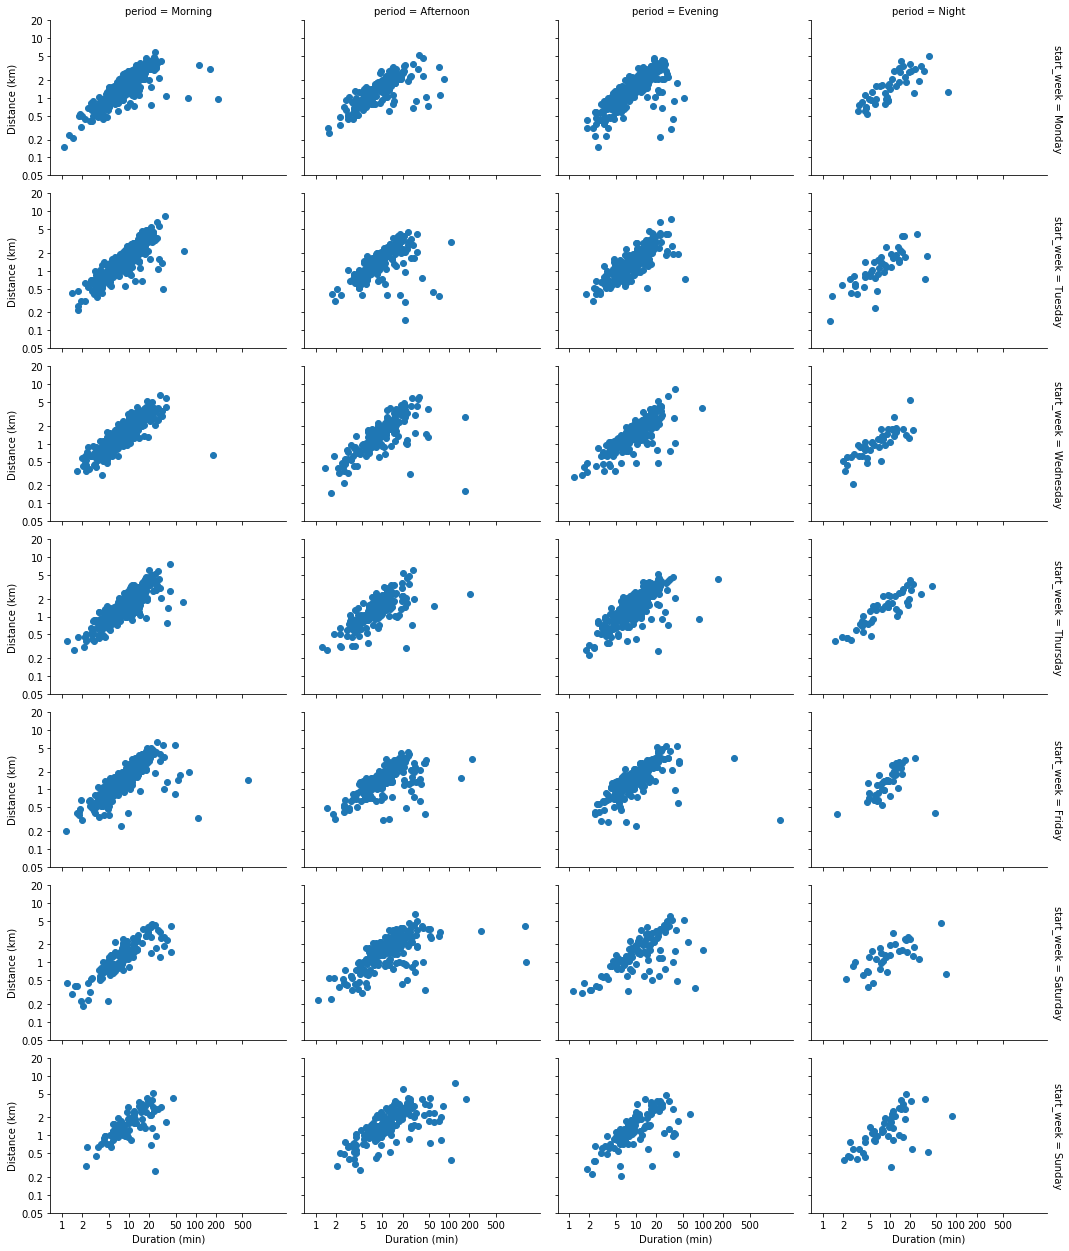

In [53]:
g= sb.FacetGrid(data=df_samp, col='period', row='start_week', height=2.5,  aspect=1.5, margin_titles = True)
g= g.map(plt.scatter, 'log_min', 'log_distance')

tick_locs1= [1,2,5,10,20,50,100,200, 500] # values for duration
tick_locs2= [0.05,0.1,0.2,0.5,1,2,5,10,20] # values for distance

g.set(xticks=log_trans(tick_locs1))
g.set(xticklabels= tick_locs1)

g.set(yticks=log_trans(tick_locs2))
g.set(yticklabels= tick_locs2)

g.set_xlabels('Duration (min)')
g.set_ylabels('Distance (km)');

There is a positive relationship between duration and distance after the log transformation, regardless of the time period and the day of the week.  Due to large amount of the data points, a heatmap would do a better job in visualizing areas with high concentrations.

In [54]:
def heatmap2(x,y,**kwargs):
    
    bins_x=np.arange(df_samp.log_min.min(), df_samp.log_min.max()+0.1,0.1)
    bins_y=np.arange(df_samp.log_distance.min(), df_samp.log_min.max()+0.1, 0.1)
    
    tick_locs1= [1,2,5,10,20,50,100,200, 500] # values for duration
    tick_locs2= [0.05,0.1,0.2,0.5,1,2,5,10,20] # values for distance

    plt.hist2d(data=df_samp, x=x, y=y, cmap='mako_r',bins=[bins_x, bins_y], cmin=1)
    plt.xticks(log_trans(tick_locs1),tick_locs1)
    plt.yticks(log_trans(tick_locs2), tick_locs2)

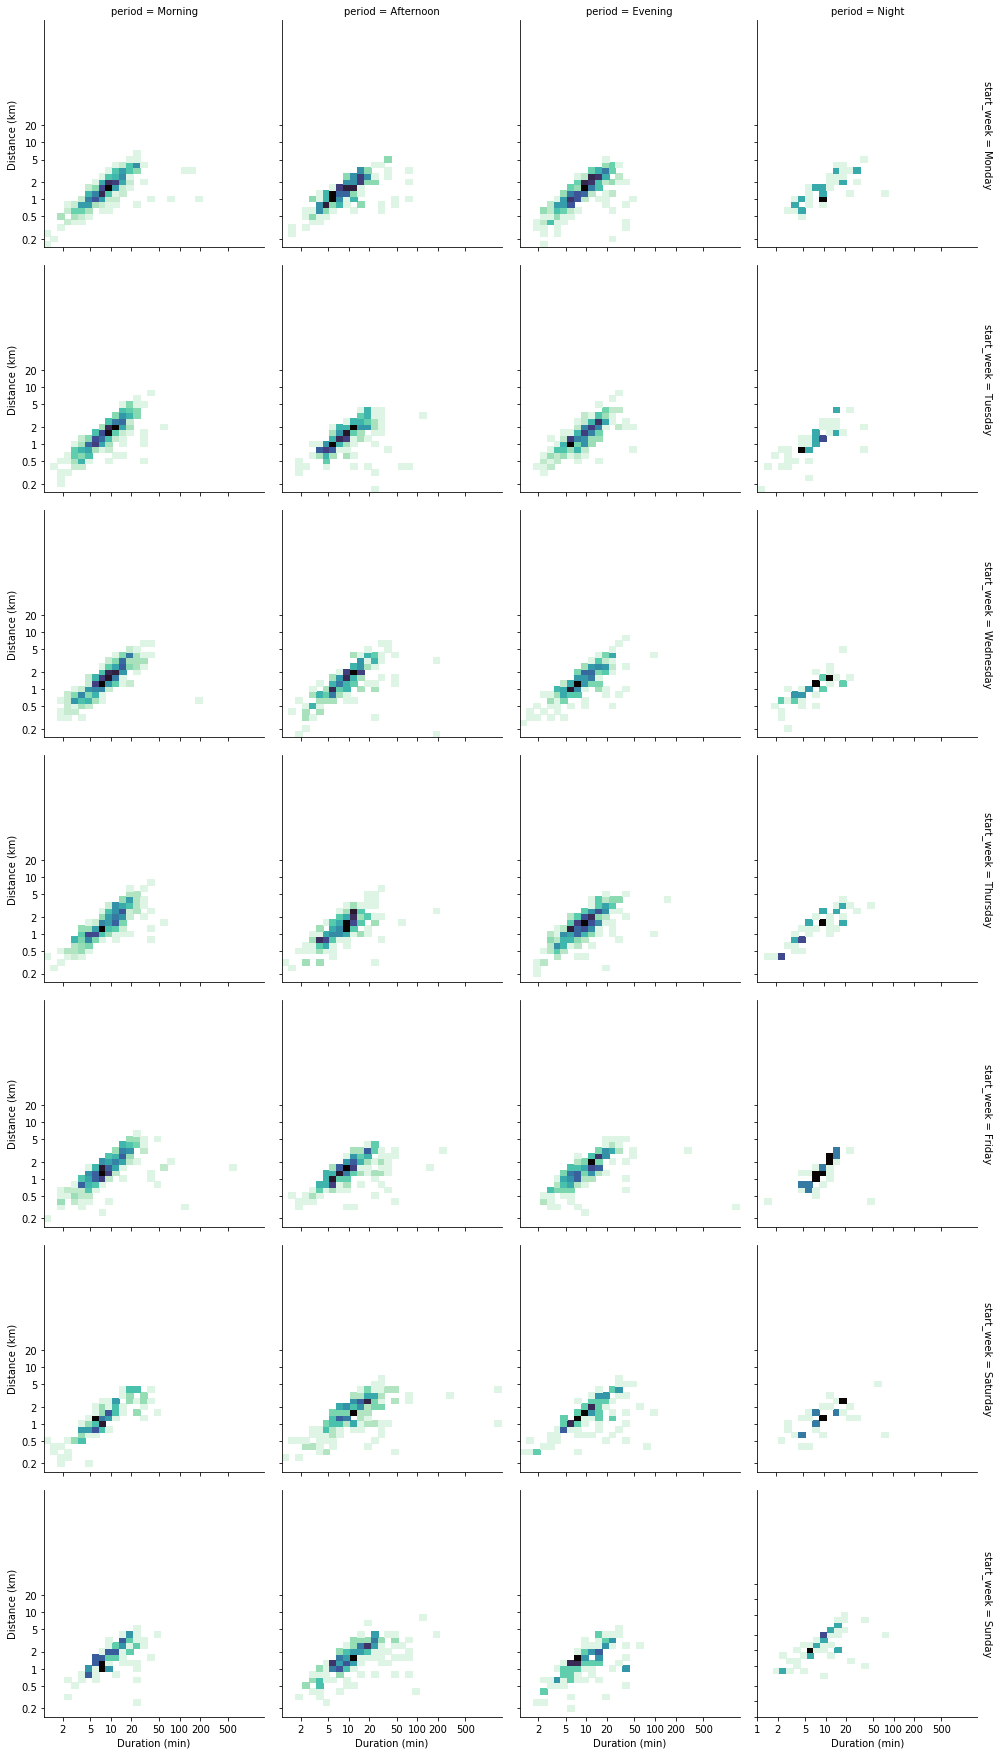

In [55]:
g= sb.FacetGrid(data=df_samp, col='period', row='start_week', height=3.5, margin_titles=True)
g.map(heatmap2, 'log_min', 'log_distance')

g.set_xlabels('Duration (min)')
g.set_ylabels('Distance (km)');

The heatmap above illustrates that most of the bike rides are between 5 to 20 minutes and around 0.5 - 2 kilometers. We can also see that the majority of usages take place between morning and evening with a significantly lower volume at night.

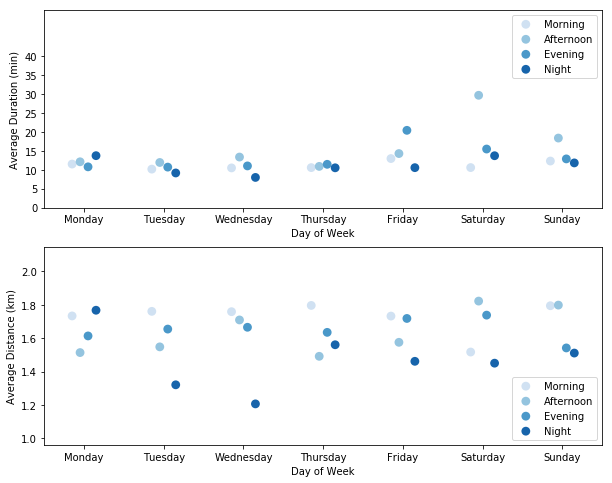

In [56]:
fig, ax = plt.subplots(2,1,figsize=[10,8])

tick_locs = np.arange(0,45,5)

sb.pointplot(data=df_samp, x='start_week', y='duration_min', hue='period', dodge=0.3, palette='Blues', ax=ax[0], linestyles='', errwidth= 0)
sb.pointplot(data=df_samp, x='start_week', y='distance', hue='period', dodge=0.3, palette='Blues', ax=ax[1], linestyles='',errwidth= 0)

ax[0].set_ylabel('Average Duration (min)')
ax[1].set_ylabel('Average Distance (km)')

ax[0].set_xlabel('Day of Week')
ax[1].set_xlabel('Day of Week')

ax[0].set_yticks(tick_locs)

ax[0].legend(loc=1);
ax[1].legend(loc=4);

The point plots above demonstrate that most bike rides take an average of 5 - 20 minutes and 1.2 - 1.8 kilometers.  Friday evening and Saturday afternoon rides have the longest duration on average, while rides on Tuesday and Wednesday nights have the shortest duration and distance.  

In [57]:
#Divide dataset into sub categories (top 20 stations vs others) for further analysis

popular = df_samp.start_station_id.value_counts().head(20).index

df_samp_popular = df_samp[df_samp['start_station_id'].isin(popular)] #top 20
df_samp_rest = df_samp[~df_samp['start_station_id'].isin(popular)] #others

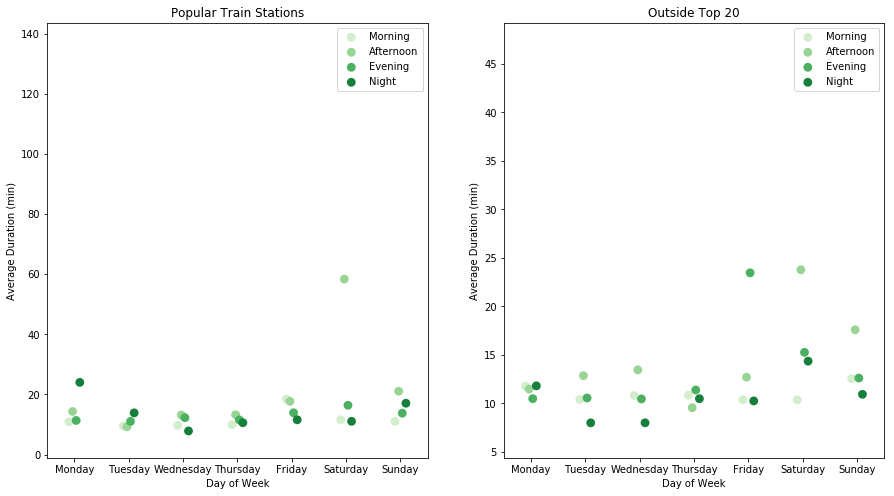

In [58]:
fig, ax = plt.subplots(1,2,figsize=[15,8])

sb.pointplot(data=df_samp_popular, x='start_week', y='duration_min', hue='period', dodge=0.2, palette='Greens', ax=ax[0], linestyles='', errwidth= 0)
sb.pointplot(data=df_samp_rest, x='start_week', y='duration_min', hue='period', dodge=0.2, palette='Greens', ax=ax[1], linestyles='',errwidth= 0)

ax[0].set_ylabel('Average Duration (min)')
ax[1].set_ylabel('Average Duration (min)')

ax[0].set_xlabel('Day of Week')
ax[1].set_xlabel('Day of Week')

ax[0].set_title('Popular Train Stations')
ax[1].set_title('Outside Top 20')

ax[0].legend(loc=1)
ax[1].legend(loc=1);

In [60]:
#Export csv for explanatory data analysis
df.to_csv('lyft_baywheels.csv')

I thought it would be interesting to see if there is any difference in the average duration between the 20 most popular stations and the rest of the entries.  Both graphs show that duration is the longest on Saturday afternoon with the top 20 stations averaging close to 60 minutes.  

The biggest surprise would be Monday night having the 2nd longest duration when we put the most popular stations under scrutiny.  The graph on the left shows that an average bike ride takes about 23 minutes on Monday night, while the graph on the right shows that it barely takes more than 10.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my peak time analysis by looking at those who are enrolled in the Bike Share for All program and the difference between subscribers and customers.  The multivariate exploration here once again showed that the general public has two very distinct peaks between 8:00 - 9:00 and 17:00-18:00 on weekdays, but this pattern is not as obvious for those who qualify for the program.  We can see that usage is well-spread for these low-income members throughout the day, with a significant amount happening between 08:00 – 20:00.

As for comparing the two different user types, the biggest difference is that only a small percentage of subscribers rode their bikes over the weekends, but a significant amount of customers use theirs between 11:00 – 18:00.

### Were there any interesting or surprising interactions between features?

The biggest surprise came when we selected the 20 most crowded stations and compared their average duration on Monday night with the rest of the entries.  The difference is quite significant as an average bike ride takes about 23 minutes on Monday night in these high-usage areas, while it only takes a bit more than 10 minutes for stations outside the Top 20.  It is also interesting to see Monday night overtaking Friday evening for having the 2nd longest duration, a result we had not seen up until this point.  